In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
rpe = [[60,62.5,65,67.5,70,72.5,75,77.5,80,82.5,85,87.5,90,92.5,95],
[21.11111111,18.88888889,16.66666667,15.29411765,14.11764706,11.11111111,10,8.888888889,7.058823529,5.882352941,5.5555556,4.444444444,3.333333333,3.157894737,2.105263158]]

In [5]:
pct,reps = rpe

In [9]:
layout = [('Wk1','10x5',60),
('Wk2','10x4',67.5),
('Wk3','10x3',75),
('Wk4','9x5',62.5),
('Wk5','9x4',70),
('Wk6','9x3',77.5),
('Wk7','7x5',65),
('Wk8','7x4',72.5),
('Wk9','7x3',80),
('Wk10','10x4',67.5),
('Wk11','6x4',75),
('Wk12','6x3',82.5),
('Wk13','9x5',70),
('Wk14','5x3',77.5),
('Wk15','5x3',85),
('Wk16','7x4',72.5),
('Wk17','7x3',80),
('Wk18','9x2',87.5)]

In [11]:

df = pd.DataFrame(data=layout,columns = ['week','repscheme','pct'])

In [12]:
df

,week,repscheme,pct
0,Wk1,10x5,60.0
1,Wk2,10x4,67.5
2,Wk3,10x3,75.0
3,Wk4,9x5,62.5
4,Wk5,9x4,70.0
5,Wk6,9x3,77.5
6,Wk7,7x5,65.0
7,Wk8,7x4,72.5
8,Wk9,7x3,80.0
9,Wk10,10x4,67.5


In [27]:
zrpe = list(zip(pct,reps))

In [37]:
np.log10()

[21.11111111]

In [114]:
df['maxReps'] = [[x[1] for x in zrpe if p in x][0] for p in df.pct]

In [330]:
df['sets'] = [(int(x[:x.find('x')])) for x in df.repscheme]
df['reps'] = [(int(x[x.find('x')+1:])) for x in df.repscheme]
#df['pct'] = df.pct/100

In [372]:
def calcs(df):
    df['firstCalc'] = df.sets*df.reps*df.pct*np.log10(df.reps/(df.maxReps)*10)
    df['secRepRemoved'] = df.sets*df.reps*df.pct/df.maxReps
    df['noRPE'] = df.sets*df.reps*df.pct
    df['addPowerRPE'] = df.noRPE + (df.reps/df.maxReps)
    df['sqrtDiffRpe'] = df.sets*df.reps*df.pct ** (np.sqrt(df.maxReps-df.reps))
    df['maxScore'] = df.pct*df['reps@9']*.3
    df['reps@9'] = df.maxReps*.9
    df['new'] = np.log10(df.reps/(df.maxReps-1)*10) *np.emath.logn(3,df.sets*df.reps)*df.pct*10
    return df

In [373]:
df = calcs(df)

In [374]:
df

,week,repscheme,pct,maxReps,sets,reps,firstCalc,secRepRemoved,reps@9,maxScore,powers,noRPE,addPowerRPE,sqrtDiffRpe,new
0,Wk1,10x5,0.600,21.111111,10,5,11.233767,1.421053,19.000000,3.420000,0.111789,30.000,30.236842,6.434267,8.450686
1,Wk2,10x4,0.675,15.294118,10,4,11.273460,1.765385,13.764706,2.787353,0.098966,27.000,27.261538,10.675935,10.129003
2,Wk3,10x3,0.750,10.000000,10,3,10.735228,2.250000,9.000000,2.025000,0.090625,22.500,22.800000,14.014075,12.140865
3,Wk4,9x5,0.625,18.888889,9,5,11.890226,1.488971,17.000000,3.187500,0.110386,28.125,28.389706,7.807325,9.666987
4,Wk5,9x4,0.700,14.117647,9,4,11.397901,1.785000,12.705882,2.668235,0.092806,25.200,25.483333,11.576746,11.055839
5,Wk6,9x3,0.775,8.888889,9,3,11.054129,2.354062,8.000000,1.860000,0.086910,20.925,21.262500,14.545607,13.487451
6,Wk7,7x5,0.650,16.666667,7,5,10.854509,1.365000,15.000000,2.925000,0.100350,22.750,23.050000,8.036103,10.601709
7,Wk8,7x4,0.725,11.111111,7,4,11.292941,1.827000,10.000000,2.175000,0.090323,20.300,20.660000,11.877528,13.133771
8,Wk9,7x3,0.800,7.058824,7,3,10.556934,2.380000,6.352941,1.524706,0.080750,16.800,17.225000,13.396129,15.402195
9,Wk10,10x4,0.675,15.294118,10,4,11.273460,1.765385,13.764706,2.787353,0.098966,27.000,27.261538,10.675935,10.129003


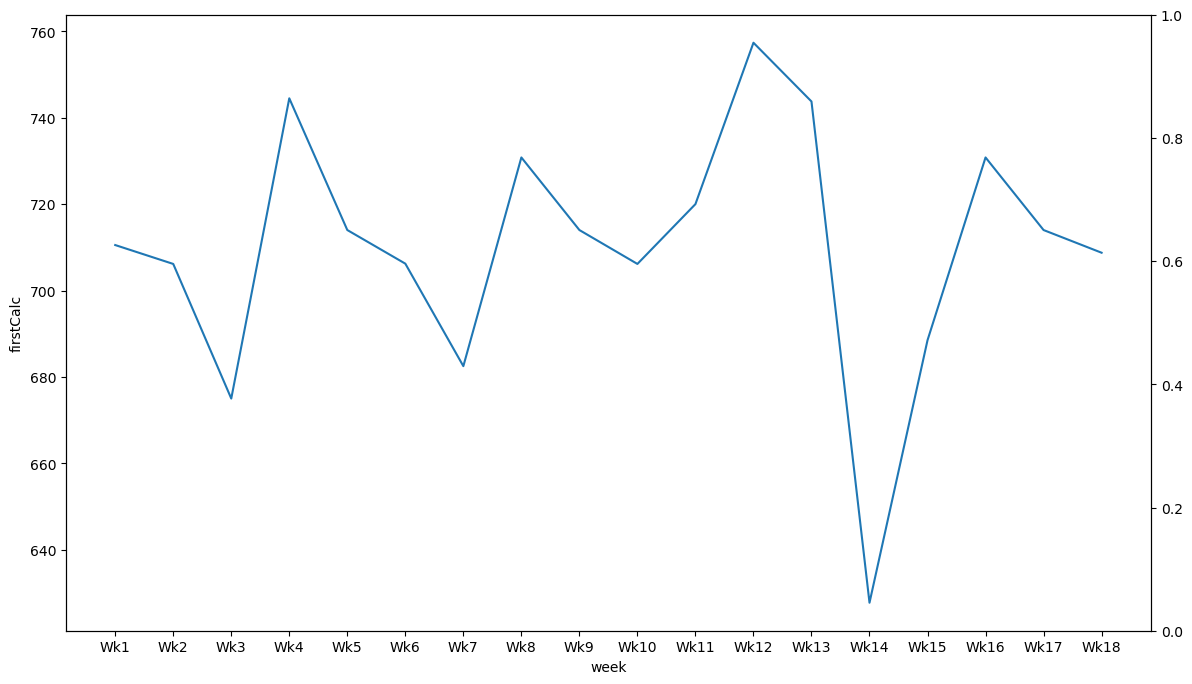

In [144]:
fig,ax1 = plt.subplots(figsize=(14,8))
ax2 = ax1.twinx()
sns.lineplot(data=df,x='week',y='firstCalc',ax=ax1)
#sns.lineplot(data=df,x='week',y='pct',ax=ax2,color='red')

plt.show()

In [345]:
def estimate(reps,pct,score=710):
    """
    reps/pct fixed at this percent, defaults to a 710 score
    """
    maxRep = [x[1] for x in zrpe if pct in x][0]
    return int(score/pct/reps/(reps/maxRep))

In [346]:
df

,week,repscheme,pct,maxReps,sets,reps,firstCalc,secRepRemoved,reps@9,maxScore,powers,noRPE,addPowerRPE,sqrtDiffRpe
0,Wk1,10x5,0.600,21.111111,10,5,7.105263,1.421053,19.000000,3.420000,0.111789,30.000,30.236842,6.434267
1,Wk2,10x4,0.675,15.294118,10,4,7.061538,1.765385,13.764706,2.787353,0.098966,27.000,27.261538,10.675935
2,Wk3,10x3,0.750,10.000000,10,3,6.750000,2.250000,9.000000,2.025000,0.090625,22.500,22.800000,14.014075
3,Wk4,9x5,0.625,18.888889,9,5,7.444853,1.488971,17.000000,3.187500,0.110386,28.125,28.389706,7.807325
4,Wk5,9x4,0.700,14.117647,9,4,7.140000,1.785000,12.705882,2.668235,0.092806,25.200,25.483333,11.576746
5,Wk6,9x3,0.775,8.888889,9,3,7.062187,2.354062,8.000000,1.860000,0.086910,20.925,21.262500,14.545607
6,Wk7,7x5,0.650,16.666667,7,5,6.825000,1.365000,15.000000,2.925000,0.100350,22.750,23.050000,8.036103
7,Wk8,7x4,0.725,11.111111,7,4,7.308000,1.827000,10.000000,2.175000,0.090323,20.300,20.660000,11.877528
8,Wk9,7x3,0.800,7.058824,7,3,7.140000,2.380000,6.352941,1.524706,0.080750,16.800,17.225000,13.396129
9,Wk10,10x4,0.675,15.294118,10,4,7.061538,1.765385,13.764706,2.787353,0.098966,27.000,27.261538,10.675935


In [348]:
for score in [850,900,950,1000]:
    print('For score',score)
    for p in pct:
        print(' at',p,'percent')
        for r in range(2,10):
            print(' ',estimate(r,p,score),'x',r)

For score 850
 at 60 percent
  74 x 2
  33 x 3
  18 x 4
  11 x 5
  8 x 6
  6 x 7
  4 x 8
  3 x 9
 at 62.5 percent
  64 x 2
  28 x 3
  16 x 4
  10 x 5
  7 x 6
  5 x 7
  4 x 8
  3 x 9
 at 65 percent
  54 x 2
  24 x 3
  13 x 4
  8 x 5
  6 x 6
  4 x 7
  3 x 8
  2 x 9
 at 67.5 percent
  48 x 2
  21 x 3
  12 x 4
  7 x 5
  5 x 6
  3 x 7
  3 x 8
  2 x 9
 at 70 percent
  42 x 2
  19 x 3
  10 x 4
  6 x 5
  4 x 6
  3 x 7
  2 x 8
  2 x 9
 at 72.5 percent
  32 x 2
  14 x 3
  8 x 4
  5 x 5
  3 x 6
  2 x 7
  2 x 8
  1 x 9
 at 75 percent
  28 x 2
  12 x 3
  7 x 4
  4 x 5
  3 x 6
  2 x 7
  1 x 8
  1 x 9
 at 77.5 percent
  24 x 2
  10 x 3
  6 x 4
  3 x 5
  2 x 6
  1 x 7
  1 x 8
  1 x 9
 at 80 percent
  18 x 2
  8 x 3
  4 x 4
  2 x 5
  2 x 6
  1 x 7
  1 x 8
  0 x 9
 at 82.5 percent
  15 x 2
  6 x 3
  3 x 4
  2 x 5
  1 x 6
  1 x 7
  0 x 8
  0 x 9
 at 85 percent
  13 x 2
  6 x 3
  3 x 4
  2 x 5
  1 x 6
  1 x 7
  0 x 8
  0 x 9
 at 87.5 percent
  10 x 2
  4 x 3
  2 x 4
  1 x 5
  1 x 6
  0 x 7
  0 x 8
  0 x 9